- DATA required for the model review is available at: https://drive.google.com/drive/folders/1tc_TU8T41q5oUF3U71c7ji6Dps1d2-Tz?usp=sharing

- Move de folder **data** next to where you have the AdvancedML_review.ipynb

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn import preprocessing

import os

%matplotlib inline

# Review - NN
- Sequential fully connected Neural Networks
- Configure input, hidden layers and output layers
- Activation functions
- Optimiser, loss and evaluation metrics in Supervised Learning with NN

In [2]:
# Load data - only to read
train_path = []
label_train = []
#path_train = "data/fingers/train_small//"
path_train = "data/fingers/train/"

for filename in os.listdir(path_train):
    
    train_path.append(path_train+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_train.append(useful_label)

test_path = []
label_test = []
#path_test = "data/fingers/test_small//"
path_test = "data/fingers/test/"

for filename in os.listdir(path_test):
    
    test_path.append(path_test+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_test.append(useful_label)

In [29]:
label_train

['0L',
 '0L',
 '2L',
 '0L',
 '5L',
 '5R',
 '2R',
 '2R',
 '3L',
 '0R',
 '4L',
 '2L',
 '0L',
 '1L',
 '2R',
 '3R',
 '0L',
 '3L',
 '5R',
 '5R',
 '4R',
 '0L',
 '2R',
 '2R',
 '0R',
 '5L',
 '0L',
 '0L',
 '3L',
 '3R',
 '2L',
 '1L',
 '0R',
 '0L',
 '5L',
 '4L',
 '1L',
 '0R',
 '4R',
 '4L',
 '5L',
 '1R',
 '2R',
 '2R',
 '5L',
 '3L',
 '3L',
 '4R',
 '5L',
 '3R',
 '2R',
 '2R',
 '2R',
 '2L',
 '5R',
 '0R',
 '5R',
 '5R',
 '2R',
 '2L',
 '4R',
 '3R',
 '5R',
 '0R',
 '0L',
 '4L',
 '1L',
 '0R',
 '2L',
 '0R',
 '1L',
 '5L',
 '0L',
 '4R',
 '2L',
 '3L',
 '1L',
 '0R',
 '3R',
 '2R',
 '2R',
 '0R',
 '1R',
 '0R',
 '5L',
 '1R',
 '1R',
 '1L',
 '2R',
 '2R',
 '1L',
 '2R',
 '2R',
 '5L',
 '3R',
 '4R',
 '1L',
 '0R',
 '5R',
 '2L',
 '1R',
 '5L',
 '5L',
 '5R',
 '2R',
 '4L',
 '2L',
 '4L',
 '0R',
 '2L',
 '5L',
 '3R',
 '3L',
 '1R',
 '1R',
 '1R',
 '5R',
 '1L',
 '4L',
 '4R',
 '0R',
 '4R',
 '3R',
 '2L',
 '5L',
 '2R',
 '1R',
 '2L',
 '3R',
 '2L',
 '2L',
 '1R',
 '4R',
 '5L',
 '3L',
 '1R',
 '1L',
 '4R',
 '2R',
 '5L',
 '2L',
 '0L',
 '4R',

In [31]:
np.unique(label_train)

array(['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L',
       '5R'], dtype='<U2')

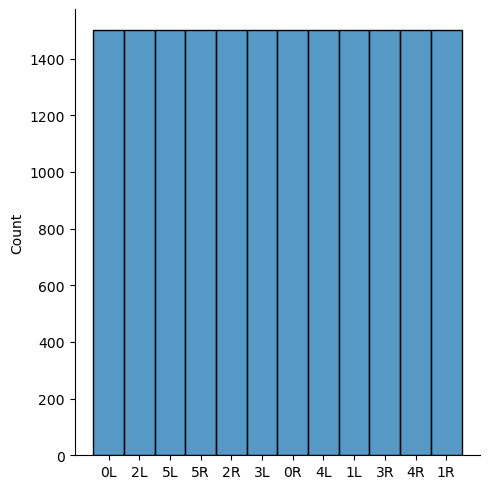

In [39]:
sns.displot(label_train)

I have a uniform distribution of the different classes, so I will assume also a uniform distribution in the test set.

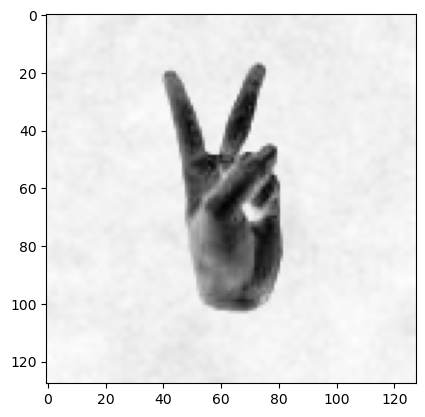

In [4]:
# Have a look at a few examples e.g., change the number in train_path[NUMBER]
img = Image.open(train_path[2]) # img = plt.imread(train_path[2]) also works
#img = plt.imread(train_path[2])

plt.imshow(img, cmap='Greys');

In [5]:
# NOTE: this cell takes some time running
# Prepare the data for the model - only to read
# resize images (all need to be the same size) and flatten images to be used by a NN model

X_train = []
X_test = []

# reading images for train data
for path in train_path:
    if path == ".DS_Store":continue
    image = Image.open(path)
    image =  image.resize((50,50))
    X_train.append(image)
    
# reading images for test data
for path in test_path:
    if path == ".DS_Store":continue
    image = Image.open(path)
    image =  image.resize((50,50))
    X_test.append(image)

X_test = np.array(X_test)
X_train = np.array(X_train)

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (18000, 50, 50)
Shape of X_test:  (149, 50, 50)


In [ ]:
# Flatten images to be used by NN model
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 #divides values by 255
X_test /= 255

In [8]:
# Prepare the target variable - only to read
import keras

lable_encoder = preprocessing.LabelEncoder()
y_train_temp = lable_encoder.fit_transform(label_train)
y_test_temp = lable_encoder.fit_transform(label_test)

y_train = keras.utils.to_categorical(y_train_temp, 12)
y_test = keras.utils.to_categorical(y_test_temp, 12)

print("Categorical values for y_train:", y_train)
print("Categorical values for y_test:", y_test)

Categorical values for y_train: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Categorical values for y_test: [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [34]:
print(y_train_temp[:3])
print(label_train[:3])


[0 0 4]
['0L', '0L', '2L']


In [13]:
y_train.shape

(18000, 12)

In [15]:
y_train[:3]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
# Number of images and width/height per X_train and X_test
X_train.shape, X_test.shape

((18000, 50, 50), (149, 50, 50))

In [ ]:
# images dimension
50*50

In [10]:
# Number of unique values i
len(np.unique(np.array(label_train)))

12

In [12]:
# Flatten your images to be represented by combination of all pixels, 50*50=2500
X_train = X_train.reshape(18000, 2500).astype('float32')
X_test = X_test.reshape(149, 2500).astype('float32')

#### **Q1.** Build a sequential model 
    - For the input layer use the input dimension with the feature dimensions (from your train/test data)
    - Use activation function relu
    - For output layer use activation function sigmoid
    - For the first hidden layer use 64 nodes, and have a second hidden layer with 32 nodes

In [16]:
# TODO - Build a sequential model 
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()
model.add(Input((2500,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(12, activation="softmax")) #I'm using softmax because we have a multiclass model.

#### **Q2.** Check the amount of parameters, traininable- and non- parameters your NN achitecture has 
    - Comment on what you see

In [18]:
# TODO - Check the amount of parameters, traininable- and non- parameters your NN achitecture has 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       160,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,540 (634.92 KB)

 Trainable params: 162,540 (634.92 KB)

 Non-trainable params: 0 (0.00 B)

#### **Q3.** Prepare your model
    - Use binary_crossentropy as a loss function
    - Stochastic Gradient Descent for optimiser
    - Precision for evaluation metric

In [20]:
# TODO - compile the keras model
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["precision"]) #I'm choosing categorical_crossentropy because we have more than 2 categories.


#### **Q4.** Train the model
    - Configure to run up to 150 epochs and use batch size of 10

In [22]:
# TODO - Train the model
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=5)
model.fit(X_train,y_train, epochs=150, batch_size=10, validation_split=0.2, callbacks=[early_stop])

Epoch 1/150
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.3402e-04 - precision: 1.0000 - val_loss: 7.7266e-04 - val_precision: 1.0000
Epoch 2/150
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.8892e-04 - precision: 1.0000 - val_loss: 7.5271e-04 - val_precision: 1.0000
Epoch 3/150
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.1750e-04 - precision: 1.0000 - val_loss: 7.2604e-04 - val_precision: 1.0000
Epoch 4/150
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.1163e-04 - precision: 1.0000 - val_loss: 7.1567e-04 - val_precision: 1.0000
Epoch 5/150
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.1870e-04 - precision: 1.0000 - val_loss: 7.1185e-04 - val_precision: 1.0000
Epoch 6/150
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.0267e-04 - precision: 1.0000 - val_loss: 6.9220e-04 - val_precision: 1.0000
Epoch 7/150
1440/1440 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.7347e-04 - precision: 1.0000 - val_loss: 7.1019e-04 - val_precision: 1.0000
Epoch 8/150
1

I wanted to perhaps reducing the number of epochs by using this callback class EarlyStopping. After 5 epoch with the same val_loss the model stops. However, here it didn't and went through the all 150 epochs.

#### **Q5.** Evaluate the model 
    - See precision on Train and Test set

In [26]:
# TODO - Evaluate the model: use evaluate from NN model
evaluation = model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5047e-05 - precision: 1.0000 


In [25]:
model.evaluate?

Signature:
model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False,
    **kwargs,
)
Docstring:
Returns the loss value & metrics values for the model in test mode.

Computation is done in batches (see the `batch_size` arg.)

Args:
    x: Input data. It can be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A backend-native tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `keras.utils.PyDataset` returning `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `tf.data.Dataset` yielding `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `torch.utils.data.DataLoader` yielding `(inputs, targets)`
        or `(i

In [43]:
print(f"The loss_val is: {evaluation[0]}\nThe precision is: {evaluation[1]}")

The loss_val is: 0.00012411356146913022
The precision is: 1.0


In [42]:
# TODO - Evaluate the model: try to use precision_score. Remember for that you'd need to use y_test_temp 
# and calculate the prediction with higher probability for each image that output layer gives 12 probabilities Tip: use .argmax()
y_predict = model.predict(X_test)

predict_class = []
for y in y_predict:
    predict_class.append(np.argmax(y))

predict_class = np.array(predict_class)
print(y_test_temp.shape)
print(predict_class.shape)

from sklearn.metrics import precision_score as ps, classification_report
precision = ps(y_test_temp,predict_class, average="macro") # I chose macro average because we have a uniform distribution of the classes.
print(precision)

print(classification_report(y_test_temp,predict_class))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(149,)
(149,)
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        10

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



# Review - NLP
- Tokenisation
- Supervised Classification
- Unsupervised Text Exploration

In [23]:
# Load BBC News
bbc_df = pd.read_csv("data/bbc_news/BBC_News.csv")

In [24]:
bbc_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [25]:
bbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


#### **Q1.** Check the Category column: how many categories do we have?

In [26]:
# Q1. TODO
bbc_df["Category"] = bbc_df["Category"].astype("category")
categories = bbc_df["Category"].cat.categories
print(f"We have {len(categories)} categories:\n{categories}")

We have 5 categories:
Index(['business', 'entertainment', 'politics', 'sport', 'tech'], dtype='object')


#### **Q2.** Check the Category column: is your dataset balanced? At this point comment on the possible challenges you will have when building a Supervised Classification model to detect if a news belows to a specific category e.g., ArticleId classified as "tech"

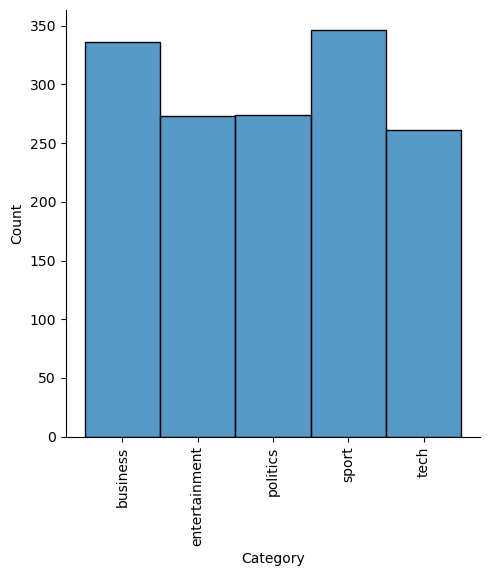

In [27]:
# Q2. TODO
sns.displot(bbc_df["Category"])
plt.xticks(rotation=90)
plt.show()

In [28]:
proportions = bbc_df["Category"].value_counts(normalize=True).reset_index()
proportions.columns = ["Categories","proportion"]
print(proportions)

      Categories  proportion
0          sport    0.232215
1       business    0.225503
2       politics    0.183893
3  entertainment    0.183221
4           tech    0.175168


In [29]:
from scipy.stats import chisquare
p=1/5
proportions["uniform"] = [p]*5

chisquare(f_obs=proportions["proportion"], f_exp=proportions["uniform"])

Power_divergenceResult(statistic=0.014229088779784686, pvalue=0.9999748113477643)

I can conclude that the categories are uniformly distributed and therefore my dataset is balanced.

#### **Q3.** Build a function *preprocess_news* to tokenise the news articles
    - Choose a tokeniser that fits the needs for the type of text you'd expect to encounter in a news article
    - Remove non-relevant characters e.g., special characters
    - Run Stemming for verbs
    - Remove stopwords

In [30]:
# Q3. TODO
for text in bbc_df["Text"]:
    print(text)
    break

worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebbe

In [31]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

In [32]:
def preprocess_news(text):
    stop_eng = stopwords.words("english")
    regex = RegexpTokenizer(r"\w+")
    ps = PorterStemmer()

    tokens = regex.tokenize(text)
    toks_stop = []
    for word in tokens:
        if word not in stop_eng:
            toks_stop.append(word)

    stems = [ps.stem(tok) for tok in toks_stop]

    return stems


#### **Q4.** Test the function preprocess_news for the first 5 news articles

e.g., the first news article output should be 

['worldcom', 'ex', 'boss', 'launch', 'defenc', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'berni', 'ebber', 'batteri', 'fraud', 'charg', 'call', 'compani', 'whistleblow', 'first', 'wit', 'cynthia', 'cooper', 'worldcom', 'ex', 'head', 'intern', 'account', 'alert', 'director', 'irregular', 'account', 'practic', 'us', 'telecom', 'giant', '2002', 'warn', 'led', 'collaps', 'firm', 'follow', 'discoveri', '11bn', '5', '7bn', 'account', 'fraud', 'mr', 'ebber', 'plead', 'guilti', 'charg', 'fraud', 'conspiraci', 'prosecut', 'lawyer', 'argu', 'mr', 'ebber', 'orchestr', 'seri', 'account', 'trick', 'worldcom', 'order', 'employe', 'hide', 'expens', 'inflat', 'revenu', 'meet', 'wall', 'street', 'earn', 'estim', 'ms', 'cooper', 'run', 'consult', 'busi', 'told', 'juri', 'new', 'york', 'wednesday', 'extern', 'auditor', 'arthur', 'andersen', 'approv', 'worldcom', 'account', 'earli', '2001', '2002', 'said', 'andersen', 'given', 'green', 'light', 'procedur', 'practic', 'use', 'worldcom', 'mr', 'ebber', 'lawyer', 'said', 'unawar', 'fraud', 'argu', 'auditor', 'alert', 'ani', 'problem', 'ms', 'cooper', 'also', 'said', 'dure', 'sharehold', 'meet', 'mr', 'ebber', 'often', 'pass', 'technic', 'question', 'compani', 'financ', 'chief', 'give', 'onli', 'brief', 'answer', 'prosecut', 'star', 'wit', 'former', 'worldcom', 'financi', 'chief', 'scott', 'sullivan', 'said', 'mr', 'ebber', 'order', 'account', 'adjust', 'firm', 'tell', 'hit', 'book', 'howev', 'ms', 'cooper', 'said', 'mr', 'sullivan', 'mention', 'anyth', 'uncomfort', 'worldcom', 'account', 'dure', '2001', 'audit', 'committe', 'meet', 'mr', 'ebber', 'could', 'face', 'jail', 'sentenc', '85', 'year', 'convict', 'charg', 'face', 'worldcom', 'emerg', 'bankruptci', 'protect', '2004', 'known', 'mci', 'last', 'week', 'mci', 'agre', 'buyout', 'verizon', 'communic', 'deal', 'valu', '6', '75bn']

In [33]:
# TODO
text_1 = preprocess_news(bbc_df["Text"].iloc[0])
print(text_1)

['worldcom', 'ex', 'boss', 'launch', 'defenc', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'berni', 'ebber', 'batteri', 'fraud', 'charg', 'call', 'compani', 'whistleblow', 'first', 'wit', 'cynthia', 'cooper', 'worldcom', 'ex', 'head', 'intern', 'account', 'alert', 'director', 'irregular', 'account', 'practic', 'us', 'telecom', 'giant', '2002', 'warn', 'led', 'collaps', 'firm', 'follow', 'discoveri', '11bn', '5', '7bn', 'account', 'fraud', 'mr', 'ebber', 'plead', 'guilti', 'charg', 'fraud', 'conspiraci', 'prosecut', 'lawyer', 'argu', 'mr', 'ebber', 'orchestr', 'seri', 'account', 'trick', 'worldcom', 'order', 'employe', 'hide', 'expens', 'inflat', 'revenu', 'meet', 'wall', 'street', 'earn', 'estim', 'ms', 'cooper', 'run', 'consult', 'busi', 'told', 'juri', 'new', 'york', 'wednesday', 'extern', 'auditor', 'arthur', 'andersen', 'approv', 'worldcom', 'account', 'earli', '2001', '2002', 'said', 'andersen', 'given', 'green', 'light', 'procedur', 'practic', 'use', 'worldcom', 'mr', 'ebb

#### **Q5.** Prepare your data for classification
    - Split your data in train/test use 30% for test and random seed 123
    - Represent train and test data in the same feature space by using your custom function (*preprocess_news*) and TFIDF weighting scheme

In [34]:
# TODO - Split your data in train/test use 30% for test and random seed 123
from sklearn.model_selection import train_test_split
X = bbc_df["Text"]
y = bbc_df["Category"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=123) #the categories are statistically uniformly distributed. But I prefer to keep as much as possible the distribution


In [35]:
# TODO - Represent train and test data in the same feature space by using your custom function (*preprocess_news*) and TFIDF weighting scheme
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=preprocess_news, max_features=1000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

X_train_vec.shape


(1043, 1000)

#### **Q6.** Build a supervised model and evaluate the model performance
    - Use Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html)
    - Evaluate the model performance: use micro and macro averaging (use 4 decimal cases e.g., 0.8123)
    - Build a heatmap with seaborn package to see the percentage of TP per each class and the incorrect classifications where they were missclassified. Format the heatmap to 
        - show the % with 2 decimal cases
        - show in x and y ticks the labels for the Categories names e.g., "tech"
        - show in x and y the the labels for predicted and actual

In [36]:
# TODO - Use Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html)
from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, precision_score


I will first try the naive bayes without reducing the dimensions as it is said that it works well with big dimensions. If it's not good then I will first reduce the dimensions and use a KNN model.

In [37]:
# TODO - Evaluate the model performance: use micro and macro averaging
nb = MultinomialNB()
nb.fit(X_train_vec,y_train)
y_predict = nb.predict(X_test_vec)

classes = nb.classes_
print(classes)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [45]:
def matrix_visu(y_test,y_pred,classes):
    cm = confusion_matrix(y_test,y_pred,labels=classes)
    sns.heatmap(cm, annot=True)
    plt.title('Confusion matrix of the classifier\n')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

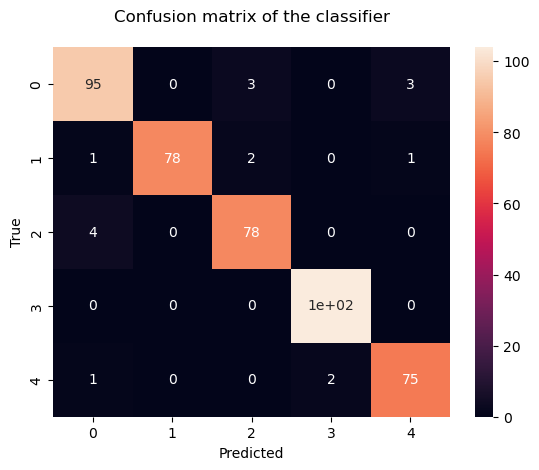

In [46]:
matrix_visu(y_test=y_test, y_pred=y_predict, classes=classes)

That's not bad at all. The cells in the diagonale are the TP for each class. 

In [47]:
print(classification_report(y_test,y_predict))

               precision    recall  f1-score   support

     business       0.94      0.94      0.94       101
entertainment       1.00      0.95      0.97        82
     politics       0.94      0.95      0.95        82
        sport       0.98      1.00      0.99       104
         tech       0.95      0.96      0.96        78

     accuracy                           0.96       447
    macro avg       0.96      0.96      0.96       447
 weighted avg       0.96      0.96      0.96       447



In [48]:
precision_NB = round(precision_score(y_test,y_predict, average="macro"),2)
print(precision_NB)

0.96


In [21]:
# TODO - Build a heatmap with seaborn package to see the percentage of TP per each class and the incorrect classifications where they were missclassified. Format the heatmap to 
#        - show the % with 2 decimal cases
#        - show in x and y ticks the labels for the Categories names e.g., "tech"
#        - show in x and y the the labels for predicted and actual


In [49]:
conf_matrix = confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[ 95   0   3   0   3]
 [  1  78   2   0   1]
 [  4   0  78   0   0]
 [  0   0   0 104   0]
 [  1   0   0   2  75]]


In [50]:
conf_matrix = pd.DataFrame(conf_matrix, columns=classes, index=classes)
total = len(y_test)
print(classes)

for col in conf_matrix.columns:
   conf_matrix[col] = (conf_matrix[col]/total).round(2)

conf_matrix

['business' 'entertainment' 'politics' 'sport' 'tech']


,business,entertainment,politics,sport,tech
business,0.21,0.00,0.01,0.00,0.01
entertainment,0.00,0.17,0.00,0.00,0.00
politics,0.01,0.00,0.17,0.00,0.00
sport,0.00,0.00,0.00,0.23,0.00
tech,0.00,0.00,0.00,0.00,0.17


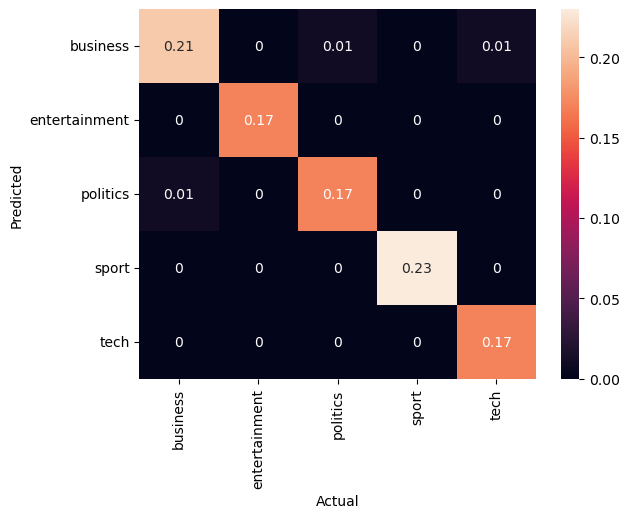

In [51]:
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### **Q7.** Use Word2Vec Gensim model to build the word vectors for the BBC News Articles
    - For tokenisation use the function implemented before *preprocess_news*
    - Use minimum frequency of each token of 2

In [52]:
# TODO - Use Word2Vec Gensim model to build the word vectors for the BBC News Articles
from gensim.models import Word2Vec

Word2Vec?

Init signature:
Word2Vec(
    sentences=None,
    corpus_file=None,
    vector_size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    ns_exponent=0.75,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    epochs=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    comment=None,
    max_final_vocab=None,
    shrink_windows=True,
)
Docstring:     
Serialize/deserialize objects from disk, by equipping them with the `save()` / `load()` methods.

Warnings
--------
This uses pickle internally (among other techniques), so objects must not contain unpicklable attributes
such as lambda functions etc.
Init docstring:
Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.

Once you're finished training a model (=no more updates, only querying)
store

In [53]:
bbc_df["tokens"] = bbc_df["Text"].apply(lambda text:preprocess_news(text))


In [54]:
word_vec = Word2Vec(sentences=bbc_df["tokens"], min_count=2)

#### **Q8.** Check what are the words more similar to "earth", "love", "sad"

In [59]:
# TODO **Q7.** Check what are the words more similar to "earth", "love", "sad"
simil_earth = word_vec.wv.most_similar("earth", topn=5)
simil_love = word_vec.wv.most_similar("love", topn=5)
simil_sad = word_vec.wv.most_similar("sad", topn=5)

In [60]:
simil_earth

[('unlik', 0.9979330897331238),
 ('ground', 0.9978745579719543),
 ('determin', 0.9977539777755737),
 ('southern', 0.9976671934127808),
 ('eventu', 0.997575044631958)]

In [61]:
simil_love

[('special', 0.9931513667106628),
 ('career', 0.9924404621124268),
 ('compet', 0.9910933375358582),
 ('outstand', 0.9904949069023132),
 ('moment', 0.9901472330093384)]

In [62]:
simil_sad

[('concentr', 0.9901858568191528),
 ('challeng', 0.9888014197349548),
 ('stay', 0.9886149168014526),
 ('unlik', 0.9885237216949463),
 ('posit', 0.9885185956954956)]

# Review - Recommender Systems
- Popularity based
- Content based
- Collaborative filtering

#### **Q1.** Explain in your own words what is the difference between the 3 types of recommender systems that you've learned: Popularity, Content-based and Collaborative Filtering

Popularity : it's only based on the popularity, which how many times an item has been bought or rated.  

Content_based: it recommends based on the similarity of the content.  

Collaborative filtering: recommends a user based on its similar behaviour with other users. 

#### **Q2.** Popularity based
    - Recommend TOP 10 most popular products
    - Only for Beauty & Hygiene and Beverages
        - Make sure TOP 5 products are from each category
    - Normalise ratings by rounding the rating e.g., 4.3 -> 4
    - Products with ratings below 4 should not be recommended

In [32]:
# Load data
bigbasket_df = pd.read_csv("data/bigbasket/BigBasketProducts.csv")

bigbasket_df.head(2)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."


In [33]:
duplicates_products = bigbasket_df[bigbasket_df.duplicated(subset=["product","brand","description"], \
                                                           keep=False)]
print(duplicates_products.head())
print(len(duplicates_products))

    index                                 product                category  \
0       1  Garlic Oil - Vegetarian Capsule 500 mg        Beauty & Hygiene   
9      10    Scrub Pad - Anti- Bacterial, Regular    Cleaning & Household   
11     12          Butter Cookies Gold Collection    Gourmet & World Food   
16     17          Smooth Skin Oil - For Dry Skin        Beauty & Hygiene   
26     27                 Granola - Happy Berries  Snacks & Branded Foods   

              sub_category              brand  sale_price  market_price  \
0                Hair Care  Sri Sri Ayurveda        220.0         220.0   
9   Mops, Brushes & Scrubs       Scotch brite        20.0          20.0   
11   Chocolates & Biscuits           Sapphire       600.0         600.0   
16               Skin Care    Aroma Treasures       324.0         360.0   
26       Breakfast Cereals         Fit & Flex       245.0         265.0   

                        type  rating  \
0           Hair Oil & Serum     4.1   
9   Ut

In [34]:
duplicates_products.sort_values(by="product", inplace=True)
print(duplicates_products.head())

       index                             product                category  \
20241  20242     1-2-3 Noodles - Chicken Flavour  Snacks & Branded Foods   
21400  21401     1-2-3 Noodles - Chicken Flavour  Snacks & Branded Foods   
25403  25404     1-2-3 Noodles - Pure Vegetarian  Snacks & Branded Foods   
17372  17373     1-2-3 Noodles - Pure Vegetarian  Snacks & Branded Foods   
9485    9486  1-2-3 Noodles - Veg Masala Flavour  Snacks & Branded Foods   

                    sub_category    brand  sale_price  market_price  \
20241           Snacks & Namkeen  Wai Wai        12.0          12.0   
21400  Noodle, Pasta, Vermicelli  Wai Wai        12.0          12.0   
25403  Noodle, Pasta, Vermicelli  Wai Wai        28.0          35.0   
17372           Snacks & Namkeen  Wai Wai        28.0          35.0   
9485   Noodle, Pasta, Vermicelli  Wai Wai        12.0          12.0   

                  type  rating  \
20241  Instant Noodles     4.2   
21400  Instant Noodles     4.2   
25403  Instant

C:\Users\Angelique\AppData\Local\Temp\ipykernel_3520\817044755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates_products.sort_values(by="product", inplace=True)


In [35]:
# TODO - Only for Beauty & Hygiene and Beverages
bigbasket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [36]:
bigbasket_df["category"] = bigbasket_df["category"].astype("category")
categories = bigbasket_df["category"].cat.categories
categories

Index(['Baby Care', 'Bakery, Cakes & Dairy', 'Beauty & Hygiene', 'Beverages',
       'Cleaning & Household', 'Eggs, Meat & Fish', 'Foodgrains, Oil & Masala',
       'Fruits & Vegetables', 'Gourmet & World Food', 'Kitchen, Garden & Pets',
       'Snacks & Branded Foods'],
      dtype='object')

In [37]:
# TODO -  Normalise ratings
beauty_bevr = bigbasket_df[(bigbasket_df["category"] == "Beauty & Hygiene") |\
                            (bigbasket_df["category"] == "Beverages")]

beauty_bevr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8752 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         8752 non-null   int64   
 1   product       8751 non-null   object  
 2   category      8752 non-null   category
 3   sub_category  8752 non-null   object  
 4   brand         8752 non-null   object  
 5   sale_price    8752 non-null   float64 
 6   market_price  8752 non-null   float64 
 7   type          8752 non-null   object  
 8   rating        6098 non-null   float64 
 9   description   8738 non-null   object  
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 692.7+ KB


In [38]:
beauty_bevr["rating"].head()

0    4.1
4    4.4
6    3.6
7    4.0
8    3.5
Name: rating, dtype: float64

In [39]:
beauty_bevr["category"] = beauty_bevr["category"].cat.remove_categories(['Baby Care', 'Bakery, Cakes & Dairy',
       'Cleaning & Household', 'Eggs, Meat & Fish', 'Foodgrains, Oil & Masala',
       'Fruits & Vegetables', 'Gourmet & World Food', 'Kitchen, Garden & Pets',
       'Snacks & Branded Foods'])

C:\Users\Angelique\AppData\Local\Temp\ipykernel_3520\2921521505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beauty_bevr["category"] = beauty_bevr["category"].cat.remove_categories(['Baby Care', 'Bakery, Cakes & Dairy',


In [40]:
beauty_bevr["rating"] = beauty_bevr["rating"].round(0)
beauty_bevr["rating"].head()

C:\Users\Angelique\AppData\Local\Temp\ipykernel_3520\2246711724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beauty_bevr["rating"] = beauty_bevr["rating"].round(0)


0    4.0
4    4.0
6    4.0
7    4.0
8    4.0
Name: rating, dtype: float64

In [41]:
print(beauty_bevr["rating"].max())
print(beauty_bevr["rating"].min())

5.0
1.0


In [42]:
null_ratings = beauty_bevr[beauty_bevr["rating"].isna()]
null_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, 55 to 27514
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         2654 non-null   int64   
 1   product       2654 non-null   object  
 2   category      2654 non-null   category
 3   sub_category  2654 non-null   object  
 4   brand         2654 non-null   object  
 5   sale_price    2654 non-null   float64 
 6   market_price  2654 non-null   float64 
 7   type          2654 non-null   object  
 8   rating        0 non-null      float64 
 9   description   2647 non-null   object  
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 210.1+ KB


In [43]:
null_ratings["category"].value_counts()

category
Beauty & Hygiene    2403
Beverages            251
Name: count, dtype: int64

In [44]:
null_ratings.groupby("category")["sub_category"].value_counts()

C:\Users\Angelique\AppData\Local\Temp\ipykernel_3520\814451769.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_ratings.groupby("category")["sub_category"].value_counts()


category          sub_category            
Beauty & Hygiene  Health & Medicine           732
                  Skin Care                   653
                  Fragrances & Deos           373
                  Hair Care                   210
                  Bath & Hand Wash            186
                  Men's Grooming              155
                  Feminine Hygiene             59
                  Oral Care                    29
                  Makeup                        5
                  Mothers & Maternity           1
                  Coffee                        0
                  Energy & Soft Drinks          0
                  Fruit Juices & Drinks         0
                  Health Drink, Supplement      0
                  Tea                           0
                  Water                         0
Beverages         Fruit Juices & Drinks       141
                  Tea                          65
                  Energy & Soft Drinks         22
       

In [45]:
null_ratings_prices = null_ratings.groupby("category")["sale_price"].describe()
null_ratings_prices

C:\Users\Angelique\AppData\Local\Temp\ipykernel_3520\2851162591.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_ratings_prices = null_ratings.groupby("category")["sale_price"].describe()


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Beauty & Hygiene,2403.0,658.907524,855.437579,22.5,200.00,360.0,750.0,8184.44
Beverages,251.0,265.374382,322.567072,10.0,92.95,178.2,312.5,2330.00


In [46]:
non_null = beauty_bevr[~(beauty_bevr.isin(null_ratings))]
b_and_B_price = non_null.groupby("category")["sale_price"].describe()
b_and_B_price

C:\Users\Angelique\AppData\Local\Temp\ipykernel_3520\2436140605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b_and_B_price = non_null.groupby("category")["sale_price"].describe()


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Beauty & Hygiene,5464.0,313.029733,378.382353,3.0,119.2375,204.965,374.250,6660.0
Beverages,634.0,229.617823,225.253780,9.0,100.0000,175.000,293.625,3480.0


It seems that the products that do not have any ratings are more expensive.

In [47]:
from outliers_modules import Outliers

outl_bev_price = Outliers(beauty_bevr[beauty_bevr["category"] == "Beverages"],"sale_price")
outl_bev_price.percentiles()
bev_price_max_Out = outl_bev_price.outliers_max()

bev_outl = beauty_bevr[(beauty_bevr["category"] == "Beverages") &\
                       (beauty_bevr["sale_price"] >= bev_price_max_Out)]

bev_outl.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1280 to 27474
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         53 non-null     int64   
 1   product       53 non-null     object  
 2   category      53 non-null     category
 3   sub_category  53 non-null     object  
 4   brand         53 non-null     object  
 5   sale_price    53 non-null     float64 
 6   market_price  53 non-null     float64 
 7   type          53 non-null     object  
 8   rating        31 non-null     float64 
 9   description   53 non-null     object  
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 4.3+ KB


Among the 53 beverages with an outlier price, 22 do not have a rating

In [48]:
bev_outl_rating = bev_outl["rating"].describe()
print(bev_outl_rating)

count    31.000000
mean      4.161290
std       0.582911
min       3.000000
25%       4.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: rating, dtype: float64


In [49]:
beauOutl = Outliers(beauty_bevr[beauty_bevr["category"] == "Beauty & Hygiene"],"sale_price")
beauOutl.percentiles()
max_beautOutl = beauOutl.outliers_max()

beaut_outl = beauty_bevr[(beauty_bevr["category"] == "Beauty & Hygiene") &\
                         (beauty_bevr["sale_price"] >= max_beautOutl)]
beaut_outl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 8 to 27542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         705 non-null    int64   
 1   product       705 non-null    object  
 2   category      705 non-null    category
 3   sub_category  705 non-null    object  
 4   brand         705 non-null    object  
 5   sale_price    705 non-null    float64 
 6   market_price  705 non-null    float64 
 7   type          705 non-null    object  
 8   rating        250 non-null    float64 
 9   description   705 non-null    object  
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 55.9+ KB


Among the beauty price outliers 455 do not have any ratings.

In [50]:
ratings_beauty_outl = beaut_outl["rating"].describe()
ratings_beauty_outl

count    250.000000
mean       3.644000
std        1.303865
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [51]:
print(beaut_outl.groupby("sub_category")["rating"].median())

sub_category
Bath & Hand Wash     4.0
Feminine Hygiene     4.0
Fragrances & Deos    4.0
Hair Care            3.0
Health & Medicine    4.0
Makeup               NaN
Men's Grooming       4.0
Oral Care            3.5
Skin Care            4.0
Name: rating, dtype: float64


In [52]:
# TODO - Products with ratings below 4 should not be recommended
rating_4_and_above = beauty_bevr.copy().loc[beauty_bevr["rating"] >= 4]

In [53]:
rating_4_and_above.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5075 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         5075 non-null   int64   
 1   product       5074 non-null   object  
 2   category      5075 non-null   category
 3   sub_category  5075 non-null   object  
 4   brand         5075 non-null   object  
 5   sale_price    5075 non-null   float64 
 6   market_price  5075 non-null   float64 
 7   type          5075 non-null   object  
 8   rating        5075 non-null   float64 
 9   description   5069 non-null   object  
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 401.6+ KB


In [54]:
# TODO - TOP 10 - Most popular recommendations for Beauty & Higiene and Beverages
rating_4_and_above = rating_4_and_above.sample(frac=1, random_state=1984).reset_index(drop=True)
rating_4_and_above["rank"] = rating_4_and_above.groupby("category")["rating"].rank(method="first")
top10_beauty_bevr = rating_4_and_above.sort_values(by=["rating","rank"]).iloc[:10]
print(top10_beauty_bevr[["category","sub_category","rating","rank"]])

            category              sub_category  rating  rank
0   Beauty & Hygiene         Health & Medicine     4.0   1.0
2          Beverages                       Tea     4.0   1.0
1   Beauty & Hygiene                 Skin Care     4.0   2.0
10         Beverages                       Tea     4.0   2.0
3   Beauty & Hygiene                 Hair Care     4.0   3.0
31         Beverages  Health Drink, Supplement     4.0   3.0
4   Beauty & Hygiene         Health & Medicine     4.0   4.0
68         Beverages     Fruit Juices & Drinks     4.0   4.0
5   Beauty & Hygiene         Health & Medicine     4.0   5.0
85         Beverages                    Coffee     4.0   5.0


C:\Users\Angelique\AppData\Local\Temp\ipykernel_3520\2280122564.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_4_and_above["rank"] = rating_4_and_above.groupby("category")["rating"].rank(method="first")


#### **Q3.** Content-based
    - Build a content-based recommender model for BigBasket
    - Use the product description, category, sub_category, type and brand information
        - Make sure that e.g., the product "type" "Lamp & Lamp Oil" is not tokenised by word instead should be "lamp_lamp_oil"
    - Use TFIDF weighting scheme, and build a custom function
        - custom function *preprocess_text* should remove special characters, use lemmatization for verbs and remove stopwords
    - Use linear kernel to compute the similarity matrix

In [55]:
bigbasket_df.shape

(27555, 10)

In [122]:
columns = ["product", "category", "sub_category", "type", "brand", "description"]

bigbasket_products_df = bigbasket_df[columns].copy()
bigbasket_products_df = bigbasket_products_df.drop_duplicates(subset=["product","brand"], keep="first")
bigbasket_products_df = bigbasket_products_df.reset_index()

In [123]:
bigbasket_products_df.shape

(24616, 7)

In [124]:
# TODO - Use the product description, category, sub_category, type and brand information
bigbasket_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24616 entries, 0 to 24615
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         24616 non-null  int64   
 1   product       24615 non-null  object  
 2   category      24616 non-null  category
 3   sub_category  24616 non-null  object  
 4   type          24616 non-null  object  
 5   brand         24615 non-null  object  
 6   description   24511 non-null  object  
dtypes: category(1), int64(1), object(5)
memory usage: 1.2+ MB


In [125]:
print(bigbasket_products_df[bigbasket_products_df["brand"].isna()])

      index                product              category  \
9311   9765  Food Package - Medium  Cleaning & Household   

                  sub_category                       type brand description  
9311  Disposables, Garbage Bag  Aluminium Foil, Clingwrap   NaN         NaN  


In [126]:
bigbasket_products_df["brand"] = bigbasket_products_df["brand"].fillna("no_brand")
bigbasket_products_df["description"] = bigbasket_products_df["description"].fillna("no_description")

In [127]:
def categories_to_toks(df,col):
    tok_list = df[col].str.replace(",","")
    tok_list = tok_list.str.replace("-","")
    tok_list = tok_list.str.replace(" ","_")
    return tok_list

In [128]:
cols = ["category","sub_category","type","brand"] 
for col in cols:
    bigbasket_products_df[col] = categories_to_toks(bigbasket_products_df,col)

print(bigbasket_products_df[cols].head())

                category           sub_category                     type  \
0       Beauty_&_Hygiene              Hair_Care         Hair_Oil_&_Serum   
1  Kitchen_Garden_&_Pets  Storage_&_Accessories   Water_&_Fridge_Bottles   
2   Cleaning_&_Household            Pooja_Needs          Lamp_&_Lamp_Oil   
3   Cleaning_&_Household   Bins_&_Bathroom_Ware  Laundry_Storage_Baskets   
4       Beauty_&_Hygiene       Bath_&_Hand_Wash     Bathing_Bars_&_Soaps   

               brand  
0  Sri_Sri_Ayurveda_  
1         Mastercook  
2                Trm  
3             Nakoda  
4              Nivea  


In [129]:
# Bag-Of-Words list
cols = cols + ["description"]
bag_of_words = []
print(cols)

for _,row in bigbasket_products_df.iterrows():
    list_strings = []
    bow = []
    for col in cols:
        list_strings.append(row[col])
    bow = " ".join(list_strings)
    bag_of_words.append(bow)

bigbasket_products_df["Bag_of_words"] = bag_of_words
print(bigbasket_products_df["Bag_of_words"].head())
        

['category', 'sub_category', 'type', 'brand', 'description']
0    Beauty_&_Hygiene Hair_Care Hair_Oil_&_Serum Sr...
1    Kitchen_Garden_&_Pets Storage_&_Accessories Wa...
2    Cleaning_&_Household Pooja_Needs Lamp_&_Lamp_O...
3    Cleaning_&_Household Bins_&_Bathroom_Ware Laun...
4    Beauty_&_Hygiene Bath_&_Hand_Wash Bathing_Bars...
Name: Bag_of_words, dtype: object


In [130]:
# TODO - Use TFIDF weighting scheme, and build a custom function
#         - custom function should use lemmatization for verbs and remove stopwords
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
def preprocess_text(text):
    stop_eng = stopwords.words("english")
    regex = RegexpTokenizer(r"\w+")
    lemmatizer = WordNetLemmatizer()

    tokens = regex.tokenize(text)
    toks_stop = []
    for word in tokens:
        if word not in stop_eng:
            toks_stop.append(word)

    lems = [lemmatizer.lemmatize(tok, pos="v") for tok in toks_stop]

    return lems

In [131]:
bigbasket_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24616 entries, 0 to 24615
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         24616 non-null  int64 
 1   product       24615 non-null  object
 2   category      24616 non-null  object
 3   sub_category  24616 non-null  object
 4   type          24616 non-null  object
 5   brand         24616 non-null  object
 6   description   24616 non-null  object
 7   Bag_of_words  24616 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.5+ MB


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(analyzer=preprocess_text, max_features=500)
Bag_of_words = bigbasket_products_df["Bag_of_words"]

descrip_vect = tfidf2.fit_transform(Bag_of_words)

In [133]:
descrip_vect.shape

(24616, 500)

In [134]:
products = bigbasket_products_df["product"]

In [135]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15)
nmf.fit(descrip_vect)
nmf_features = nmf.transform(descrip_vect)

print(nmf_features.shape)

(24616, 15)


In [136]:
from sklearn.preprocessing import normalize
normalize_features = normalize(nmf_features)

In [137]:
# TODO - Use linear kernel to compute the similarity matrix
# Compute the cosine similarity matrix
from sklearn.metrics.pairwise import linear_kernel
normalize_features = np.float32(normalize_features)
simil_matrix = linear_kernel(normalize_features)


In [138]:
simil_matrix.shape

(24616, 24616)

In [139]:
# Construct a reverse map of indices and movie titles
simil_pdcts_df = pd.DataFrame(simil_matrix, index=products, columns=products)


In [140]:
products_list = simil_pdcts_df.columns
print(products_list[:20])
products_index = simil_pdcts_df.index
print(products_index[:20])

Index(['Garlic Oil - Vegetarian Capsule 500 mg', 'Water Bottle - Orange',
       'Brass Angle Deep - Plain, No.2',
       'Cereal Flip Lid Container/Storage Jar - Assorted Colour',
       'Creme Soft Soap - For Hands & Body',
       'Germ - Removal Multipurpose Wipes', 'Multani Mati',
       'Hand Sanitizer - 70% Alcohol Base',
       'Biotin & Collagen Volumizing Hair Shampoo + Biotin & Collagen Hair Conditioner',
       'Scrub Pad - Anti- Bacterial, Regular', 'Wheat Grass Powder - Raw',
       'Butter Cookies Gold Collection', 'Face Wash - Oil Control, Active',
       'Mold & Mildew Remover with Bleach',
       'Just Spray - Mosquito Repellent Room Spray',
       'Dove Plastic Soap Case - Assorted Colour',
       'Smooth Skin Oil - For Dry Skin', 'Salted Pumpkin',
       'Flax Seeds - Roasted', 'Organic Tofu - Soy Paneer'],
      dtype='object', name='product')
Index(['Garlic Oil - Vegetarian Capsule 500 mg', 'Water Bottle - Orange',
       'Brass Angle Deep - Plain, No.2',
       'C

In [141]:
simil_pdcts_df.head(2)

product,Garlic Oil - Vegetarian Capsule 500 mg,Water Bottle - Orange,"Brass Angle Deep - Plain, No.2",Cereal Flip Lid Container/Storage Jar - Assorted Colour,Creme Soft Soap - For Hands & Body,Germ - Removal Multipurpose Wipes,Multani Mati,Hand Sanitizer - 70% Alcohol Base,Biotin & Collagen Volumizing Hair Shampoo + Biotin & Collagen Hair Conditioner,"Scrub Pad - Anti- Bacterial, Regular",...,Popcorn - French Butter & Pink Salt,"Brass Dhoop Aarti With Wooden Handle,No.3",Toilet Cleaning Brush - Round With Holder (Big),Organic Powder - Garam Masala,Powder - Baking,Apple Cider Vinegar Shampoo,"Wottagirl! Perfume Spray - Heaven, Classic",Rosemary,Peri-Peri Sweet Potato Chips,Green Tea - Pure Original
product,,,,,,,,,,,,,,,,,,,,,
Garlic Oil - Vegetarian Capsule 500 mg,1.000000,0.001015,0.026036,0.000908,0.619124,0.053850,0.827544,0.108101,0.097696,0.000452,...,0.061967,0.147656,0.019021,0.059346,0.001651,0.090112,0.307532,0.036781,0.065664,0.033211
Water Bottle - Orange,0.001015,1.000000,0.338951,0.963472,0.025136,0.017023,0.000000,0.022789,0.014338,0.014897,...,0.209023,0.140137,0.214740,0.075633,0.014971,0.014312,0.010640,0.022705,0.035596,0.000001


In [142]:
most_simil = simil_pdcts_df.loc['Smooth Skin Oil - For Dry Skin'].reset_index()
most_simil.columns = ["product","similarity"]
most_simil.sort_values(by="similarity", ascending=False, inplace=True)
most_simil.reset_index(drop=True, inplace=True)
most_simil.iloc[1:6]

,product,similarity
1,Charcoal Face Pack,0.999089
2,Multani Mitti + Sandal Face Pack,0.998841
3,Cucumber Skin Toner/Astringent,0.998731
4,Papaya & Apricot Scrub,0.998692
5,Activated Charcoal Facewash,0.998603


In [150]:
def get_recommendations(product,n):
    if product not in simil_pdcts_df.columns:
        print(f"{product} does not belong to our product list")
    else:
        most_simil = simil_pdcts_df.loc[product].reset_index()
        most_simil.columns = ["product","similarity"]
        most_simil.sort_values(by="similarity", ascending=False, inplace=True)
        most_simil.reset_index(drop=True, inplace=True)
        return most_simil["product"].iloc[1:n+1]

In [151]:
get_recommendations('Salted Pumpkin',10)

1                           Gluten-Free Singhara Atta
2             Integrale - Whole Wheat Pennette Rigate
3                                        Healthy Atta
4                         Singhara Atta - Gluten Free
5            Gluten-Free Vegetable Millet Khichdi Mix
6             Gluten-Free Rajgira Atta/Amaranth Flour
7     Gluten-Free Phulka Atta - Help in Control Sugar
8                             Fettucine Italian Pasta
9                                         Barley Atta
10                      Rajgira Ke Atta - Gluten Free
Name: product, dtype: object

In [152]:
get_recommendations("Shower Gel", 5)

Shower Gel does not belong to our product list


In [146]:
# Function that takes in product name as input and outputs most similar products
#def get_recommendations(
 #   product_name,
  #  cosine_sim=cosine_sim,
   # indices=indices,
    #df=bigbasket_products_df
#):#
   # # Get the index of the movie that matches the title
    #idx = indices[product_name]  # 1171 /Alien
#
 #   # Get the pairwsie similarity scores of all movies with that movie
  #  sim_scores = list(enumerate(cosine_sim[idx]))  # Fetching all cosine similarities for movie 1171
#
 #   # Sort the movies based on the similarity scores
  #  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # Sorting similar movies from highest to lowest
#
 #   # Get the scores of the 10 most similar movies
  #  sim_scores = sim_scores[1:11]
#
 #   # Get the movie indices
  #  product_indices = [i[0] for i in sim_scores]
#
 #   # Return the top 10 most similar movies
  #  return df["product"].iloc[product_indices]

In [153]:
product_name = "Water Bottle - Orange"

get_recommendations(product_name,5)

1       Rectangular Container - With lid, Multicolour
2            Round Plastic Container - With Lid, Pink
3                               Water Bottle - Orange
4    Round & Flat Storage Container - With lid, Green
5                              Jar - With Lid, Yellow
Name: product, dtype: object

row3 has the same product name but the brand might not be the same.

In [154]:
product_name = "Peri-Peri Sweet Potato Chips"

get_recommendations(product_name,5)

1             Salsa Sweet Potato Chips
2             Peri-Peri Beetroot Chips
3              Barbeque Beetroot Chips
4       Instant Popcorn - Seven Spices
5    Instant Popcorn - Natural Healthy
Name: product, dtype: object

#### **Q4.** Collaborative Filtering
    - Use the Restaurant data and build a Collaborative Filtering model
    - Use the measures RMSE and MAE
    - Use 3-fold cross validation

In [4]:
# Load data with user_id, product_id and rating
restaurant_df = pd.read_csv("data/restaurant/rating_final.csv")

restaurant_df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [5]:
restaurant_df["avr_rating"] = (restaurant_df["rating"] + restaurant_df["food_rating"] + \
                               restaurant_df["service_rating"])/3
restaurant_df["avr_rating"].describe()

count    1161.000000
mean        1.168533
std         0.697849
min         0.000000
25%         0.666667
50%         1.333333
75%         2.000000
max         2.000000
Name: avr_rating, dtype: float64

In [6]:
restaurant_df["avr_rating"] = restaurant_df["avr_rating"].round(2)


<Axes: xlabel='avr_rating', ylabel='Count'>

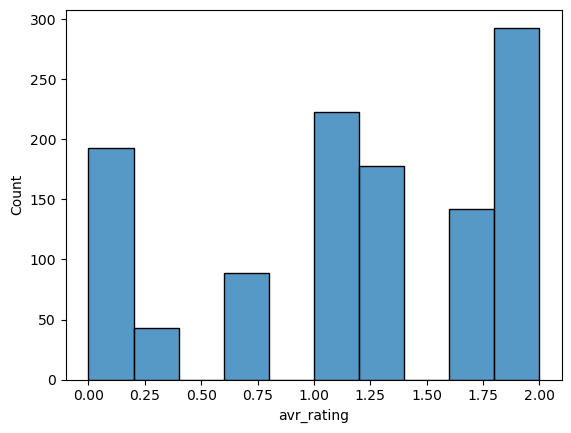

In [13]:
sns.histplot(restaurant_df["avr_rating"], bins=10)

In [18]:
print(len(restaurant_df["userID"].unique()))
print(len(restaurant_df["placeID"].unique()))

138
130


In [64]:
len(restaurant_df)

1161

In [65]:
1161/138

8.41304347826087

In [66]:
1161/130

8.930769230769231

On average, a restaurant received 8.9 ratings and a customer rated 8.4 restaurants. That may not be enough to evaluate customer's rating behaviour. 

In [7]:
restaurants_rating = restaurant_df[["userID","placeID","avr_rating"]]

In [2]:
# TODO - Collaborative Filtering model
# https://surprise.readthedocs.io/en/stable/reader.html
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate

In [8]:
restaurants_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userID      1161 non-null   object 
 1   placeID     1161 non-null   int64  
 2   avr_rating  1161 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.3+ KB


In [9]:
reader = Reader(rating_scale=(0,2))
dataset = Dataset.load_from_df(restaurants_rating, reader)

In [12]:
svd = SVD()
cross_validation = cross_validate(svd, dataset, measures=["RMSE", "MAE"], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.6177  0.5916  0.6024  0.6039  0.0107  
MAE (testset)     0.5090  0.4820  0.5072  0.4994  0.0123  
Fit time          0.05    0.00    0.00    0.02    0.02    
Test time         0.03    0.00    0.00    0.01    0.01    


The fact that we have a RMSE higher than the MAE suggests the presence of outliers that the model has more difficulties to predict.  
But overall, the model is not good as the error is 0.5-0.6 for a rating scale between 0 and 2.  
This is most likely due to the small amount of ratings/user and per restaurants. We need more data.  
Maybe we could think of increasing the scale of the rating?

In [22]:
trainset = dataset.build_full_trainset()
svd.fit(trainset)
user_id = "U1068"
restaurant_id = 132825	
predict_rating = svd.predict(user_id,restaurant_id).est
print(f"The user {user_id} is predicted to rate the restaurant {restaurant_id}: {predict_rating}")

The user U1068 is predicted to rate the restaurant 132825: 0.8072228332189926
